In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, fbeta_score, classification_report, make_scorer, confusion_matrix
import numpy as np
from sklearn.metrics import precision_score, recall_score, make_scorer, fbeta_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
import pickle
import xgboost as xgb

In [2]:
df = pd.read_csv('final_clean.csv')

In [3]:
df.head()

,backers_count,pledged,country,created_at,deadline,goal,id,launched_date,name,spotlight,staff_pick,state,category,city,days_active,launch_month,launch_day,launch_day_name,launch_month_name
0,0,0,the United States,2017-06-21 17:18:54,2017-07-22 23:38:29,1000.0,1166044523,2017-06-21 17:18:54,CrimpCoffee: Good Coffee Good Times,0,0,failed,Food,Portland,31,6,2,Wednesday,June
1,454,17010,Denmark,2020-10-27 13:29:35,2020-12-11 19:58:49,7500.0,986370978,2020-10-27 13:29:35,Spawns of the Great Rot - Printable stl 3d min...,1,0,successful,Games,Svendborg,45,10,1,Tuesday,October
2,1,64,the United Kingdom,2017-04-15 22:46:58,2017-05-17 12:59:30,500.0,2059825834,2017-04-15 22:46:58,Dreamcatcher Games,0,0,failed,Games,Enfield,31,4,5,Saturday,April
3,92,6223,the United States,2020-11-04 17:18:51,2021-01-04 05:30:00,5000.0,1462846972,2020-11-04 17:18:51,Felbar's Shoppe of Curiosities and Occult for ...,1,0,successful,Games,Chicago,60,11,2,Wednesday,November
4,128,10448,the United States,2020-07-20 15:40:27,2020-10-30 16:00:00,10000.0,1635933643,2020-07-20 15:40:27,Wander: Flavorful and Functional Pantry Staples,1,0,successful,Food,Brooklyn,102,7,0,Monday,July


In [4]:
def country(x):
    if x == 'the United States':
        return 'USA'
    else:
        return 'Other'
df['country_grouped'] = df.country.apply(country)

In [5]:
df['target'] = df.state.apply(lambda x: 1 if x=='successful' else 0)

In [6]:
df.head()

,backers_count,pledged,country,created_at,deadline,goal,id,launched_date,name,spotlight,...,state,category,city,days_active,launch_month,launch_day,launch_day_name,launch_month_name,country_grouped,target
0,0,0,the United States,2017-06-21 17:18:54,2017-07-22 23:38:29,1000.0,1166044523,2017-06-21 17:18:54,CrimpCoffee: Good Coffee Good Times,0,...,failed,Food,Portland,31,6,2,Wednesday,June,USA,0
1,454,17010,Denmark,2020-10-27 13:29:35,2020-12-11 19:58:49,7500.0,986370978,2020-10-27 13:29:35,Spawns of the Great Rot - Printable stl 3d min...,1,...,successful,Games,Svendborg,45,10,1,Tuesday,October,Other,1
2,1,64,the United Kingdom,2017-04-15 22:46:58,2017-05-17 12:59:30,500.0,2059825834,2017-04-15 22:46:58,Dreamcatcher Games,0,...,failed,Games,Enfield,31,4,5,Saturday,April,Other,0
3,92,6223,the United States,2020-11-04 17:18:51,2021-01-04 05:30:00,5000.0,1462846972,2020-11-04 17:18:51,Felbar's Shoppe of Curiosities and Occult for ...,1,...,successful,Games,Chicago,60,11,2,Wednesday,November,USA,1
4,128,10448,the United States,2020-07-20 15:40:27,2020-10-30 16:00:00,10000.0,1635933643,2020-07-20 15:40:27,Wander: Flavorful and Functional Pantry Staples,1,...,successful,Food,Brooklyn,102,7,0,Monday,July,USA,1


In [7]:
df.columns

Index(['backers_count', 'pledged', 'country', 'created_at', 'deadline', 'goal',
       'id', 'launched_date', 'name', 'spotlight', 'staff_pick', 'state',
       'category', 'city', 'days_active', 'launch_month', 'launch_day',
       'launch_day_name', 'launch_month_name', 'country_grouped', 'target'],
      dtype='object')

In [8]:
X = df[['goal', 'staff_pick', 'category', 'days_active', 'launch_month', 'launch_day', 'country_grouped']]
y=df[['target']]

In [9]:
X = pd.get_dummies(X, columns=['country_grouped', 'category'], drop_first=True)

In [53]:
X.shape

(171251, 20)

In [54]:
X.columns

Index(['goal', 'staff_pick', 'days_active', 'launch_month', 'launch_day',
       'country_grouped_USA', 'category_Comics', 'category_Crafts',
       'category_Dance', 'category_Design', 'category_Fashion',
       'category_Film & Video', 'category_Food', 'category_Games',
       'category_Journalism', 'category_Music', 'category_Photography',
       'category_Publishing', 'category_Technology', 'category_Theater'],
      dtype='object')

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)



In [11]:
param_grid = {'max_depth': np.arange(3, 12)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)
tree_precision= precision_score(y_test, tree_preds)


In [12]:
tree_precision

0.7130326353355979

In [13]:
tree.best_params_

{'max_depth': 10}

In [14]:
# get validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

In [15]:
dt = DecisionTreeClassifier(max_depth=10)

In [16]:
fbeta = make_scorer(fbeta_score, beta=0.5)
dt.fit(X_train, y_train)
precision_train = cross_val_score(dt, X_train, y_train, cv=10, scoring='precision')

In [17]:
recall_train= cross_val_score(dt, X_train, y_train, cv=10, scoring='recall')
fbeta_train=cross_val_score(dt, X_train, y_train, cv=10, scoring=fbeta)
print("Precision training: {:6.4f},   Recall training: {:6.4f}, Fbeta training: {:6.4f}".format(np.mean(precision_train), 
                                                     np.mean(recall_train), np.mean(fbeta_train)))

Precision training: 0.7126,   Recall training: 0.8428, Fbeta training: 0.7353


In [18]:
precision_val = cross_val_score(dt, X_val, y_val, cv=10, scoring='precision')
recall_val= cross_val_score(dt, X_val, y_val, cv=10, scoring='recall')
fbeta_val=cross_val_score(dt, X_val, y_val, cv=10, scoring=fbeta)
print("Precision validation: {:6.4f},   Recall validation: {:6.4f}, Fbeta validation: {:6.4f}".format(np.mean(precision_val), 
                                                     np.mean(recall_val), np.mean(fbeta_val)))

Precision validation: 0.6982,   Recall validation: 0.8446, Fbeta validation: 0.7232


In [19]:
rf = RandomForestClassifier(random_state = 42)

In [20]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 12, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
y_train = np.ravel(y_train)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=42, verbose=2)

In [22]:
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [23]:
X_train, y_train = np.array(X_train), np.ravel(y_train)
rf = RandomForestClassifier(n_estimators=20, min_samples_split=5, min_samples_leaf=4, max_features='sqrt', 
                            max_depth=None, bootstrap=True,random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=20, random_state=42)

In [24]:
precision_rf_train = cross_val_score(rf, X_train, y_train, cv=10, scoring='precision')

In [25]:
recall_rf_train= cross_val_score(rf, X_train, y_train, cv=10, scoring='recall')
fbeta_rf_train=cross_val_score(rf, X_train, y_train, cv=10, scoring=fbeta)
print("Precision training: {:6.4f},   Recall training: {:6.4f}, Fbeta training: {:6.4f}".format(np.mean(precision_rf_train), 
                                                     np.mean(recall_rf_train), np.mean(fbeta_rf_train)))

Precision training: 0.7319,   Recall training: 0.8085, Fbeta training: 0.7460


In [26]:
X_val, y_val = np.array(X_val), np.ravel(y_val)
precision_rf_val = cross_val_score(rf, X_val, y_val, cv=10, scoring='precision')
recall_rf_val= cross_val_score(rf, X_val, y_val, cv=10, scoring='recall')
fbeta_rf_val=cross_val_score(rf, X_val, y_val, cv=10, scoring=fbeta)
print("Precision training: {:6.4f},   Recall training: {:6.4f}, Fbeta training: {:6.4f}".format(np.mean(precision_rf_val), 
                                                     np.mean(recall_rf_val), np.mean(fbeta_rf_val)))

Precision training: 0.7259,   Recall training: 0.8038, Fbeta training: 0.7402


In [34]:
# increasing number of trees to 100 and min leaves to 6 to see if metrics improve
rf2 = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_features='sqrt', 
                            max_depth=None, bootstrap=True,random_state = 42)
rf2.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=5, random_state=42)

In [35]:
precision_rf2_train = cross_val_score(rf2, X_train, y_train, cv=10, scoring='precision')
recall_rf2_train= cross_val_score(rf2, X_train, y_train, cv=10, scoring='recall')
fbeta_rf2_train=cross_val_score(rf2, X_train, y_train, cv=10, scoring=fbeta)
print("Precision training: {:6.4f},   Recall training: {:6.4f}, Fbeta training: {:6.4f}".format(np.mean(precision_rf2_train), 
                                                     np.mean(recall_rf2_train), np.mean(fbeta_rf2_train)))

Precision training: 0.7343,   Recall training: 0.8194, Fbeta training: 0.7499


In [76]:
X_val, y_val = np.array(X_val), np.ravel(y_val)
precision_rf2_val = cross_val_score(rf2, X_val, y_val, cv=10, scoring='precision')
recall_rf2_val= cross_val_score(rf2, X_val, y_val, cv=10, scoring='recall')
fbeta_rf2_val=cross_val_score(rf2, X_val, y_val, cv=10, scoring=fbeta)
print("Precision validation: {:6.4f},   Recall validation: {:6.4f}, Fbeta validation: {:6.4f}".format(np.mean(precision_rf_val), 
                                                     np.mean(recall_rf_val), np.mean(fbeta_rf_val)))

Precision validation: 0.7259,   Recall validation: 0.8038, Fbeta validation: 0.7402


In [37]:
y_pred = cross_val_predict(rf2, X_val, y_val, cv=10)

In [38]:
classification_report(y_val, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.71      0.60      0.65     14742\n           1       0.73      0.82      0.77     19508\n\n    accuracy                           0.72     34250\n   macro avg       0.72      0.71      0.71     34250\nweighted avg       0.72      0.72      0.72     34250\n'

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (rf2.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['failed', 'successful'],
           yticklabels=['failed', 'successful']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title('Random Forest')

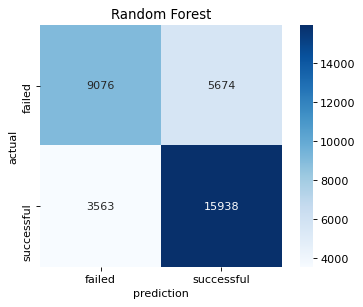

In [75]:
make_confusion_matrix(rf2)
plt.savefig('rf_matrix.png')

Feature: 0, Score: 0.28919
Feature: 1, Score: 0.16290
Feature: 2, Score: 0.18814
Feature: 3, Score: 0.08095
Feature: 4, Score: 0.05730
Feature: 5, Score: 0.01442
Feature: 6, Score: 0.02487
Feature: 7, Score: 0.02405
Feature: 8, Score: 0.00102
Feature: 9, Score: 0.00425
Feature: 10, Score: 0.00513
Feature: 11, Score: 0.00809
Feature: 12, Score: 0.04718
Feature: 13, Score: 0.00934
Feature: 14, Score: 0.02118
Feature: 15, Score: 0.01215
Feature: 16, Score: 0.01704
Feature: 17, Score: 0.00954
Feature: 18, Score: 0.02143
Feature: 19, Score: 0.00183


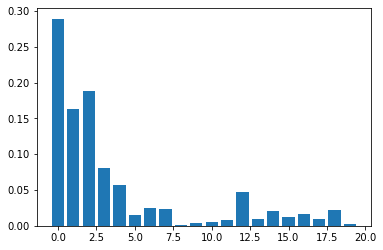

In [52]:
importance = rf2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

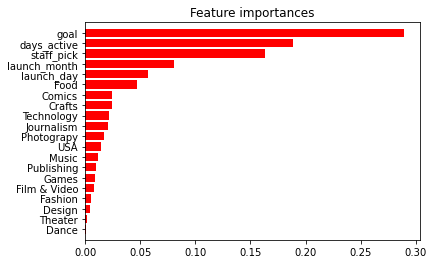

In [102]:
std = np.std([rf2.feature_importances_ for tree in rf2.estimators_],
             axis=0)
indices = np.argsort(importance)
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importance[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
labels=['Dance', 'Theater', 'Design', 'Fashion', 'Film & Video', 'Games', 'Publishing', 'Music', 'USA', 'Photograpy',
       'Journalism', 'Technology', 'Crafts', 'Comics','Food', 'launch_day', 'launch_month', 'staff_pick', 'days_active', 'goal']

plt.yticks(range(X.shape[1]), labels)
plt.ylim([-1, X.shape[1]])
plt.savefig('feature_importances.png', bbox_inches='tight')

In [61]:
# final training 

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=2018)

In [63]:
 y_train_final= np.ravel(y_train_final)

In [88]:
rf2.fit(X_train_final, y_train_final)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=5, random_state=42)

In [66]:
precision_test = cross_val_score(rf2, X_test_final, np.ravel(y_test_final), cv=10, scoring='precision')
recall_test= cross_val_score(rf2, X_test_final, np.ravel(y_test_final), cv=10, scoring='recall')
fbeta_test=cross_val_score(rf2, X_test, np.ravel(y_test), cv=10, scoring=fbeta)
print("Precision test: {:6.4f},   Recall test: {:6.4f}, Fbeta test: {:6.4f}".format(np.mean(precision_test), 
                                                     np.mean(recall_test), np.mean(fbeta_test)))

Precision training: 0.7355,   Recall training: 0.8168, Fbeta training: 0.7504


In [67]:
pkl_filename = 'random_forest.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf2, file)

In [77]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
# predict out of sample project1 True Positive
project1=pd.DataFrame([[8494,1,30,4,20,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0]], columns =['goal', 'staff_pick', 
                      'days_active', 'launch_month', 'launch_day','country_grouped_USA', 'category_Comics', 'category_Crafts',
                      'category_Dance', 'category_Design', 'category_Fashion','category_Film & Video', 'category_Food', 'category_Games',
                      'category_Journalism', 'category_Music', 'category_Photography','category_Publishing', 'category_Technology', 'category_Theater'],dtype='float')
prediction = rf2.predict(project1)
print(prediction)

[1]


In [99]:
# predict out of sample project2  True Negative
project2=pd.DataFrame([[25000,0,31,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]], columns =['goal', 'staff_pick', 
                      'days_active', 'launch_month', 'launch_day','country_grouped_USA', 'category_Comics', 'category_Crafts',
                      'category_Dance', 'category_Design', 'category_Fashion','category_Film & Video', 'category_Food', 'category_Games',
                      'category_Journalism', 'category_Music', 'category_Photography','category_Publishing', 'category_Technology', 'category_Theater'],dtype='float')
prediction2 = rf2.predict(project2)
print(prediction2)

[0]


In [103]:
# predict out of sample project3 # False Positive
project3=pd.DataFrame([[362,0,31,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]], columns =['goal', 'staff_pick', 
                      'days_active', 'launch_month', 'launch_day','country_grouped_USA', 'category_Comics', 'category_Crafts',
                      'category_Dance', 'category_Design', 'category_Fashion','category_Film & Video', 'category_Food', 'category_Games',
                      'category_Journalism', 'category_Music', 'category_Photography','category_Publishing', 'category_Technology', 'category_Theater'],dtype='float')
prediction3 = rf2.predict(project3)
print(prediction3)

[1]


In [105]:
# predict out of sample project4 False Negative
project3=pd.DataFrame([[100000,0,46,4,1,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0]], columns =['goal', 'staff_pick', 
                      'days_active', 'launch_month', 'launch_day','country_grouped_USA', 'category_Comics', 'category_Crafts',
                      'category_Dance', 'category_Design', 'category_Fashion','category_Film & Video', 'category_Food', 'category_Games',
                      'category_Journalism', 'category_Music', 'category_Photography','category_Publishing', 'category_Technology', 'category_Theater'],dtype='float')
prediction3 = rf2.predict(project3)
print(prediction3)

[0]
